<a href="https://colab.research.google.com/github/geetaakshata/Cousera_capstone/blob/main/Business%20Problem%20and%20Data%20explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - Predicting Traffic Accident Severity
## Applied DSc Capstone by IBM/Coursera

#### 1. Introduction/Business Problem 

Road traffic injuries are currently estimated to be the eighth leading cause of death across all age groups globally, and are predicted to become the seventh leading cause of death by 2030.

Analysing a significant range of factors, including weather conditions, special events, roadworks, traffic jams among others, an accurate prediction of the severity of the accidents can be performed.

These insights, could allow law enforcement bodies to allocate their resources more effectively in advance of potential accidents, preventing when and where a severe accidents can occur as well as saving both, time and money. In addition, this knowledge of a severe accident situation can be warned to drivers so that they would drive more carefully or even change their route if it is possible or to hospital which could have set everything ready for a severe intervention in advance.

Governments should be highly interested in accurate predictions of the severity of an accident, in order to reduce the time of arrival and thus save a significant amount of people each year. Others interested could be private companies investing in technologies aiming to improve road safeness.

#### 2. Data

The original data for this project comes from the following Kaggle data set. 
The features of the dataset resulting are the following:

In the characteristics dataset, the features are : "lighting", "localisation"(agg), "type of intersection", "atmospheric conditions", "type of collisions", "department", "adress", "time" and the coordinates. Added two new features from this original dataset: "date" and "weekend" indicating if the accident occurred during the weekend or not.

In the places dataset,  keep only the features: "road categorie", "traffic regime", "number of traffic lanes", "road profile", "road shape", "surface condition", "situation", "school nearby" and "infrastructure".

From the users dataset, I have created the following features:

* num_us: total number of users involved in the accident.
* ped: Wether there are pedestrians involved or not.
* critic_age: If there is any user in between 17 and 31 y.o.
* sev : maximum gravity suffered by any user involved in the accident:
 * 0 = Unscathered or Light injury
 * 1 = Hospitalized wonded or Death

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

### Importing Data

In [10]:
df_char = pd.read_csv('/caracteristics.csv', encoding='latin-1', low_memory=False)
df_pl = pd.read_csv('/places.csv')
df_users = pd.read_csv(r'/users.csv')
df_veh = pd.read_csv(r'/vehicles.csv')
df_holi = pd.read_csv('/holidays.csv')

## caracteristics and places

In [11]:
df_char.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590


In [12]:
# dropping unrelevant columns.
df_char.drop(['adr','com', 'gps'], axis=1, inplace=True)
df_pl.drop(['v1', 'v2', 'pr', 'pr1', 'lartpc', 'larrout'], axis=1,  inplace=True)
df_veh.drop(['senc', 'occutc', 'obs', 'obsm', 'choc', 'manv', 'num_veh'], axis=1, inplace=True)
print(df_char.shape, df_pl.shape, df_veh.shape, df_users.shape)
df_pl

(839985, 13) (839985, 12) (1433389, 2) (1876005, 12)


,Num_Acc,catr,voie,circ,nbv,vosp,prof,plan,surf,infra,situ,env1
0,201600000001,3.0,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,4.0,0,2.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0
839981,200500087951,4.0,0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
839982,200500087952,4.0,0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0
839983,200500087953,4.0,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


In [13]:
df_char.columns = ['ID', 'year', 'month', 'day', 'time', 'lum', 'agg', 'int', 'atm', 'col', 'lat', 'long', 'dep']
df_pl.columns = ['ID','road_cat', 'road_num', 'traf_reg', 'num_lanes', 'res_lane', 'long_prof', 'shape', 'surf', 'infra', 'situation', 'school']
df = df_char.merge(df_pl, how='inner',on='ID')
df.head(5)

,ID,year,month,day,time,lum,agg,int,atm,col,lat,long,dep,road_cat,road_num,traf_reg,num_lanes,res_lane,long_prof,shape,surf,infra,situation,school
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,0.0,0,590,3.0,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,0.0,0,590,3.0,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,0.0,0,590,3.0,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,0.0,0,590,4.0,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,0.0,0,590,4.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0


## vehicles

In [14]:
df_veh.columns

Index(['Num_Acc', 'catv'], dtype='object')

In [15]:
df_veh.head(10)

,Num_Acc,catv
0,201600000001,7
1,201600000001,2
2,201600000002,7
3,201600000003,7
4,201600000004,32
5,201600000004,7
6,201600000005,30
7,201600000005,7
8,201600000006,7
9,201600000007,30


In [18]:
categories = df_veh['catv'].value_counts()
categories.sort_index()

1      58128
2      79884
3       5008
4       7463
5      21816
6         39
7     890217
8        120
9        300
10     70205
11        17
12        79
13      5295
14     15392
15     11782
16       657
17     11501
18      2075
19       183
20      1383
21      2762
30     59918
31     28038
32     29596
33     97185
34     13436
35       367
36      1624
37      9071
38      2524
39       328
40      1555
99      5441
Name: catv, dtype: int64

Values in the category of vehicle feature do no match with the description of this feature. There are more than 33 different classifications are found in the vehicles data set. Thus, I won't use this data due to lack of information on its meaning.

### users

In [20]:
df_users.head(5)

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [21]:
df_users.drop(['place', 'sexe', 'trajet', 'locp', 'actp', 'etatp', 'num_veh'], axis=1, inplace=True)
df_users.columns = ['ID', 'catu', 'grav', 'secu', 'year_birth']
df_users.sort_values(by='ID').head(10)

,ID,catu,grav,secu,year_birth
1678507,200500000001,1,4,11.0,1976.0
1678512,200500000001,2,1,11.0,1991.0
1678511,200500000001,2,1,11.0,1998.0
1678508,200500000001,1,3,11.0,1968.0
1678509,200500000001,2,1,11.0,1964.0
1678510,200500000001,2,1,31.0,2004.0
1678514,200500000002,1,3,21.0,1979.0
1678513,200500000002,1,1,11.0,1955.0
1678516,200500000003,1,3,21.0,1956.0
1678515,200500000003,1,1,21.0,1983.0


In [22]:
#number of users

num_users = df_users.ID.value_counts().sort_index(ascending=True)
num_users

200500000001    6
200500000002    2
200500000003    2
200500000004    4
200500000005    2
               ..
201600059428    2
201600059429    1
201600059430    2
201600059431    2
201600059432    3
Name: ID, Length: 839985, dtype: int64

In [23]:
#pedestrians

df_users['ped'] = df_users['catu'].apply(lambda x: 1 if x==3 else 0)
df_users.head(5)

,ID,catu,grav,secu,year_birth,ped
0,201600000001,1,1,11.0,1983.0,0
1,201600000001,1,3,21.0,2001.0,0
2,201600000002,1,3,11.0,1960.0,0
3,201600000002,2,3,11.0,2000.0,0
4,201600000002,2,3,11.0,1962.0,0


In [24]:
df_users2 = df_users.groupby('ID').sum()
ped = df_users2.ped
print('Accidents in which pedestrians have been involved:')
df_users2.ped.value_counts()

Accidents in which pedestrians have been involved:


0     693464
1     139020
2       6415
3        773
4        214
5         55
6         19
7         13
10         4
9          3
8          2
25         1
21         1
15         1
Name: ped, dtype: int64

In [25]:
# crical age

acc_year = df_users.ID.astype(str).str[:4] # year of the accident
age = acc_year.astype(int) - df_users['year_birth'] # age of the user
df_users['age']= age
df_users

,ID,catu,grav,secu,year_birth,ped,age
0,201600000001,1,1,11.0,1983.0,0,33.0
1,201600000001,1,3,21.0,2001.0,0,15.0
2,201600000002,1,3,11.0,1960.0,0,56.0
3,201600000002,2,3,11.0,2000.0,0,16.0
4,201600000002,2,3,11.0,1962.0,0,54.0
...,...,...,...,...,...,...,...
1876000,200500087953,1,1,13.0,1972.0,0,33.0
1876001,200500087953,1,1,13.0,1965.0,0,40.0
1876002,200500087953,1,4,23.0,1990.0,0,15.0
1876003,200500087954,1,4,13.0,1951.0,0,54.0


In [26]:
df2 = df_users[df_users['grav']==2]
deaths = df2['age'].value_counts()
deaths.sort_values(ascending=False)

total, suma, i = deaths.values.sum(), 0, 0

for num in deaths.values:
    suma += num
    per = (suma/total)*100
    if per<=50:
        i += 1
        percentage = per
print('A % 2.2f percent of a total of %4i deaths is found on the %2i first ages, being the deaths array sorted by number of deaths.' %(percentage,total,i))

A  49.96 percent of a total of 50487 deaths is found on the 25 first ages, being the deaths array sorted by number of deaths.


In [27]:
topdeaths = deaths.head(15)
print('Half of the deaths in a car accident are aged between % 2d and % 2.0i y.o.'
      % (topdeaths.index.min(), topdeaths.index.max()))
topdeaths

Half of the deaths in a car accident are aged between  17 and  31 y.o.


20.0    1630
21.0    1600
22.0    1582
19.0    1529
23.0    1401
24.0    1401
25.0    1289
18.0    1219
26.0    1177
27.0    1006
28.0     923
29.0     918
31.0     822
17.0     811
30.0     801
Name: age, dtype: int64

Text(0.5, 1.0, 'Total number of deahts by age from 2005 to 2016')

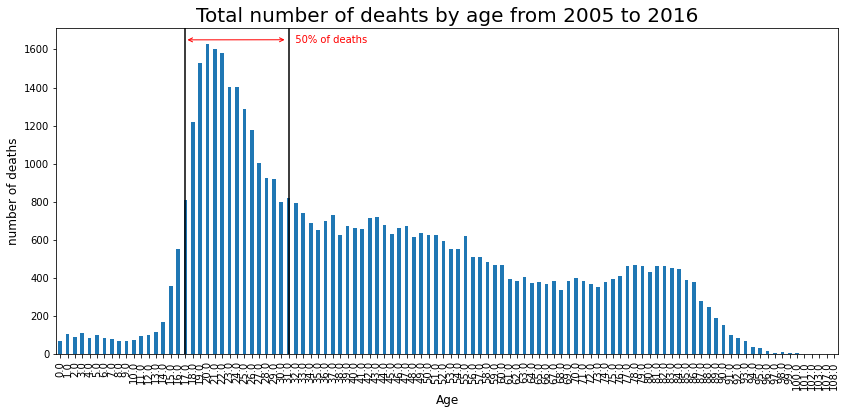

In [37]:

pd.DataFrame(deaths)
dplot=deaths.sort_index()
dplot.plot.bar(figsize=(14,6))

plt.annotate('  50% of deaths',
             color='r',
            xy=(17,1650),
            xytext=(31,1635),
            arrowprops=dict(arrowstyle='<->', color='r')
            )

plt.axvline(x=17, color='black', linestyle='-')
plt.axvline(x=31, color='black', linestyle='-')

plt.xlabel('Age', size=12)
plt.ylabel('number of deaths', size=12)
plt.title('Total number of deahts by age from 2005 to 2016', size=20)

People older than 84 are more likely to die with at least 1 out of 10 of the times, rising to beyond 35% in some cases.


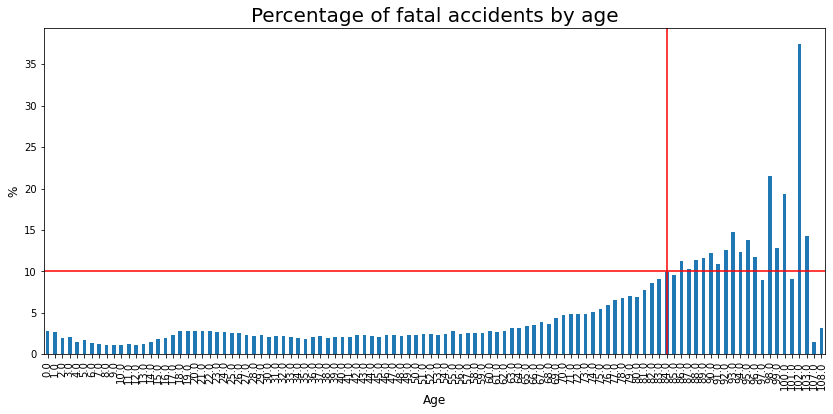

In [38]:
#deadth age
death = df2['age'].value_counts().sort_index()
total = df_users['age'].value_counts().sort_index()
death_prop = (deaths/total)*100
d = death_prop.dropna()
minimum = d[d>9.9].index.min()
d.plot.bar(figsize=(14,6))
# plt.xticks(range(108)[0::2])
plt.title('Percentage of fatal accidents by age', size=20)
plt.xlabel('Age', size=12)
plt.ylabel('%', size=12)
plt.axhline(y=10, color='r')
plt.axvline(x=84, color='r')
print('People older than {0:2} are more likely to die\
 with at least 1 out of 10 of the times, rising to beyond 35% in some cases.'.format(int(minimum)))

Last feature is the severity from the gravity feature of the users dataset. Currently it consists of 4 labels:

* Unscathed
* Dead
* Hospitalized Wonded
* Light Injury

In [39]:
def change_grav(x):
    if x==1 or x==4:
        return 0
    else:
        return 1
df3 = df_users[['ID', 'grav']].copy()
df3['grav'] = df_users['grav'].apply(change_grav)
df3.sort_values(by='ID')

,ID,grav
1678507,200500000001,0
1678512,200500000001,0
1678511,200500000001,0
1678508,200500000001,1
1678509,200500000001,0
...,...,...
133417,201600059431,0
133418,201600059431,0
133421,201600059432,0
133420,201600059432,0


In [40]:
severity = df3[['grav', 'ID']].groupby('ID').max().sort_index(ascending=True)
severity

,grav
ID,
200500000001,1
200500000002,1
200500000003,1
200500000004,1
200500000005,1
...,...
201600059428,0
201600059429,0
201600059430,0


In [41]:
df2['sev'] = severity
df2.reset_index(inplace=True)
df2

,index,ID,catu,grav,secu,year_birth,ped,age,sev
0,30,201600000014,1,2,21.0,1996.0,0,20.0,NaN
1,53,201600000022,1,2,11.0,1992.0,0,24.0,NaN
2,55,201600000023,1,2,11.0,1936.0,0,80.0,NaN
3,58,201600000025,1,2,13.0,1992.0,0,24.0,NaN
4,117,201600000056,3,2,NaN,1952.0,1,64.0,NaN
...,...,...,...,...,...,...,...,...,...
50584,1875491,200500087730,3,2,0.0,1981.0,1,24.0,NaN
50585,1875612,200500087784,3,2,0.0,1922.0,1,83.0,NaN
50586,1875682,200500087818,1,2,12.0,1959.0,0,46.0,NaN
50587,1875789,200500087864,1,2,22.0,1986.0,0,19.0,NaN


## Date and time

In [42]:
from datetime import datetime 

dt = df[['ID','year', 'month', 'day', 'time' ]]
#weekday
date = (dt.year+2000)*10000+dt.month*100+dt.day
dt['date'] = pd.to_datetime(date, format='%Y%m%d')
dt['weekday'] = dt['date'].dt.weekday #weekday functin from datetime gives a number to each day of the week from 0 to 6.

#weekend
dt['weekend'] = dt['weekday'].apply(lambda x: 1 if x>4 else 0)

#night
# dt['night'] = dt['hhmm'].apply(lambda x: 1 if 700>x or x>2100 else 0) 

#holiday
dt.loc[dt.date.isin(df_holi.ds) , 'holiday'] = 1
dt.holiday.fillna(0, inplace=True)
dt.head(5)

,ID,year,month,day,time,date,weekday,weekend,holiday
0,201600000001,16,2,1,1445,2016-02-01,0,0,0.0
1,201600000002,16,3,16,1800,2016-03-16,2,0,0.0
2,201600000003,16,7,13,1900,2016-07-13,2,0,0.0
3,201600000004,16,8,15,1930,2016-08-15,0,0,1.0
4,201600000005,16,12,23,1100,2016-12-23,4,0,0.0
